In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from flifile import FliFile
import glob
import os
import skimage
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [5]:
fli = r'C:\Users\91748\OneDrive\Desktop\ANU FRT\The Project\Animations\50msEx3msGate_TRiCAM_4108628449.fli'

In [6]:
myflifile = FliFile(fli)
data = myflifile.getdata()
#data = np.array(data, dtype = float)
#counts_s,bins_s=np.histogram(data)#, range=(0,50));
#plt.hist(data, histtype = 'step')
print(type(data), np.shape(data))#, np.unravel_index(np.argmax(data), data.shape))
print(data[1297,928])
print(np.mean(data))

<class 'numpy.ndarray'> (1920, 1200, 100)
[   2    2    2    2    2    4    2    4    3    3    3    3    3 1838
    3    3    2    2    3    3    3    3    2    3    5    4    2    1
    2    2    4    2    3    2    3    1    2    3    4    4    2    1
    3    2    2    2    2    3    2    3    2    3    2    2    3    3
    3    2    2    1    3    2    3    3    3    2    2    2    2    3
    4    4    4    3    3    2    2    2    1    2    3    1    3    3
    4    4    3    2    2    4    3    4    1    4    3    2    2    1
    3    2]
2.677759986979167


In [7]:
#dfs = [pd.DataFrame(data[:,:,i]) for i in range(data.shape[2])]

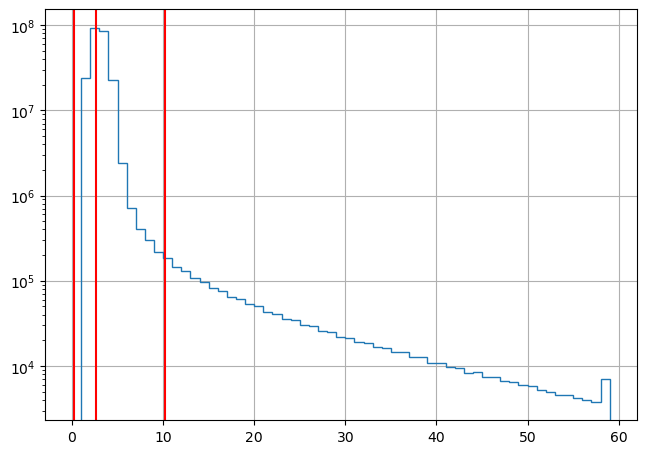

In [8]:
data = np.array(data, dtype = float)
plt.hist(data.flatten(), bins=np.arange(0, 60), histtype='step')
#plt.xticks(np.arange(0, 200, 1))  # set x-axis ticks at each integer
plt.axvline(np.mean(data), color = 'r')
plt.axvline(np.mean(data) + 3*np.std(data), color = 'r')
plt.axvline(np.mean(data) - np.std(data), color = 'r')
plt.grid(True)
plt.tight_layout()
plt.yscale('log')
plt.show()

So this is the picture. Anything below mean+3*std deviation, we speculate that it is heavily effected by noise, so we ignore it. Now probably just to get the idea of what it looks like we'll calculate that for each image in this fli file and plot one of them randomly.

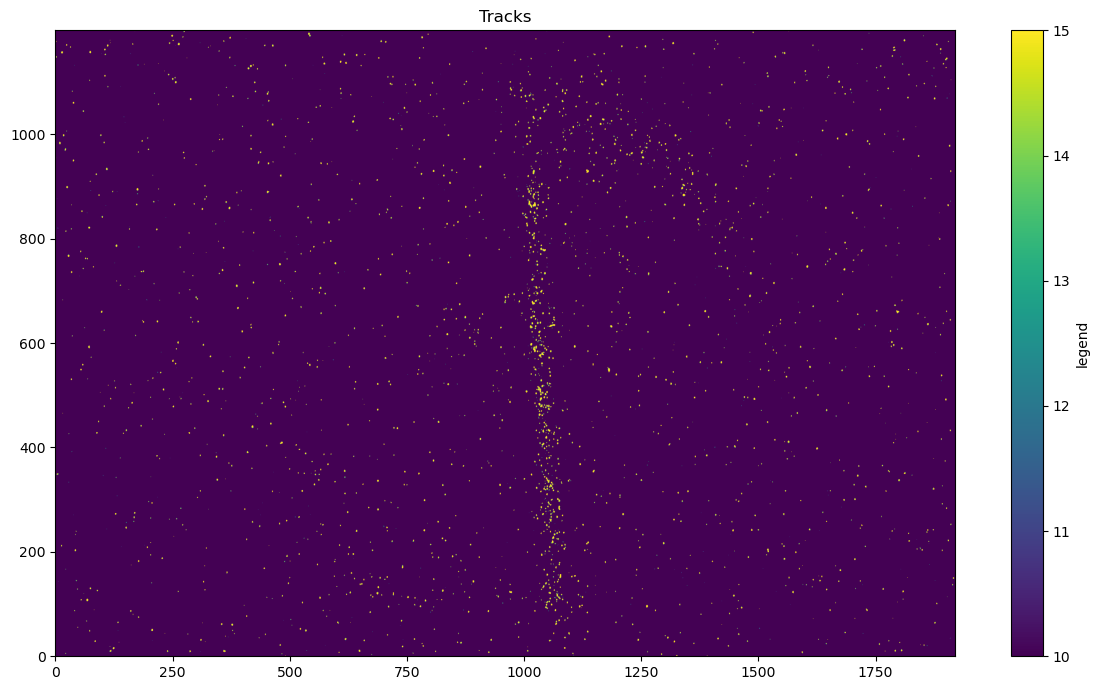

In [9]:
data_clear = np.where(data<10, 0, data)
plt.figure(figsize=(12,7))
im = plt.imshow(data_clear[: , : , 0].T, cmap = 'viridis', origin = 'lower', aspect = 'auto', vmin=10, vmax=15)
plt.colorbar(im,label = 'legend')
plt.title('Tracks')
plt.tight_layout()

In [10]:
I_track = np.sum(data_clear[975:1175, 200:800, :])/100
I_back = np.sum(data_clear[675:875, 200:800,:])/100
I_dark = np.sum(data_clear[100:300, 200:800,:])/100
print(I_track, I_back, I_dark)

77832.89 12928.34 9672.6


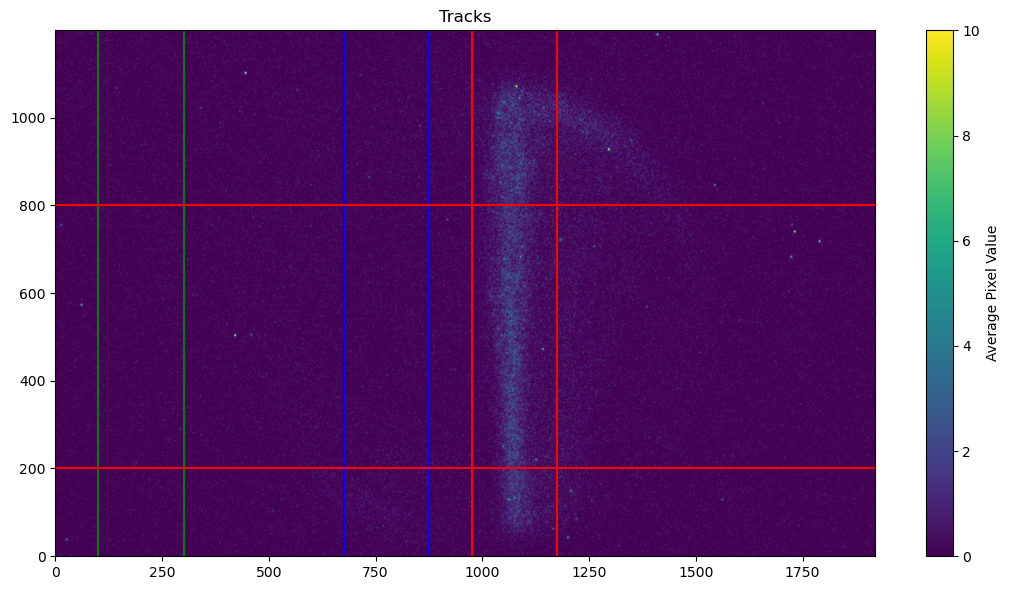

<Figure size 640x480 with 0 Axes>

In [11]:
avg_data = np.mean(data_clear, axis =2) #so this will average DU value (i think its called that) at each pixel
#lets do some plotting
plt.figure(figsize=(11,6))
im = plt.imshow(avg_data.T, cmap='viridis', origin='lower', aspect='auto', vmin=0, vmax=10) #C-P job this
plt.colorbar(im, label='Average Pixel Value')
plt.axvline(975, color = 'r')
plt.axvline(1175,color='r')
plt.axvline(675, color = 'b')
plt.axvline(875,color = 'b')
plt.axvline(100, color='g')
plt.axvline(300, color = 'g')
plt.axhline(200, color = 'r')
plt.axhline(800, color = 'r')
plt.title('Tracks')
plt.tight_layout()
plt.show()
plt.savefig('Layout of the areas chosen.png')

Now Let us make a function and returns all the value of our moderated function

['C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx100musGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx10musGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx1msGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx200musGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx20musGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx3msGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx500musGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx50musGate_TRiCAM_4108628449.fli', 'C:\\Users\\91748\\OneDrive\\Desktop\\ANU FRT\\The Project\\Animations\\50msEx5msGate_TRiCAM_4108628449.

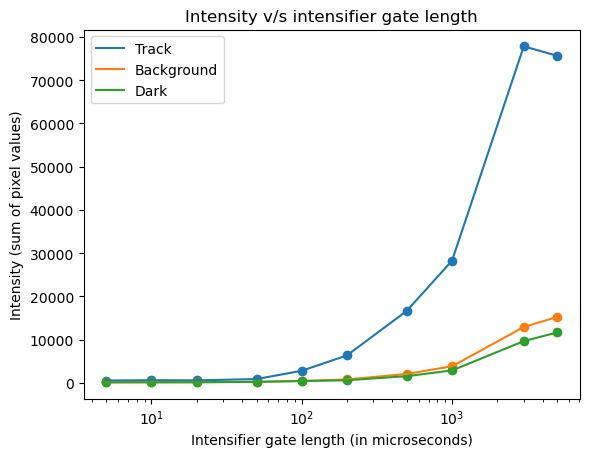

In [12]:
datafolder = r'C:\Users\91748\OneDrive\Desktop\ANU FRT\The Project\Animations'
fli_files = sorted(glob.glob(os.path.join(datafolder, "*.fli")))
def intensity_finder(file_path):
    myflifile = FliFile(file_path)
    data = myflifile.getdata()
    data = np.array(data, dtype = float)
    data_clear = np.where(data<10, 0, data)
    I_track = np.sum(data_clear[975:1175, 200:800, :])/100
    I_back = np.sum(data_clear[675:875, 200:800,:])/100
    I_dark = np.sum(data_clear[100:300, 200:800,:])/100
    return I_track, I_back, I_dark
print(fli_files)
I_track = []
I_back = []
I_dark = []
for fli in fli_files:
    x, y, z = intensity_finder(fli)
    I_track.append(x)
    I_back.append(y)
    I_dark.append(z)
x_axis = np.array([100,10,1000,200,20,3000,500,50,5000,5])
sorted_indices = np.argsort(x_axis)
x_axis = x_axis[sorted_indices]
#print(I_track, I_back, I_dark)
plt.plot(x_axis, np.array(I_track)[sorted_indices], label='Track')
plt.plot(x_axis, np.array(I_back)[sorted_indices], label='Background')
plt.plot(x_axis, np.array(I_dark)[sorted_indices], label='Dark')
plt.scatter(x_axis, np.array(I_track)[sorted_indices])
plt.scatter(x_axis, np.array(I_back)[sorted_indices])
plt.scatter(x_axis, np.array(I_dark)[sorted_indices])
plt.xlabel('Intensifier gate length (in microseconds)')
plt.ylabel('Intensity (sum of pixel values)')
plt.title('Intensity v/s intensifier gate length')
plt.xscale('log')
plt.legend()
plt.savefig('10 being the cutoff.png')

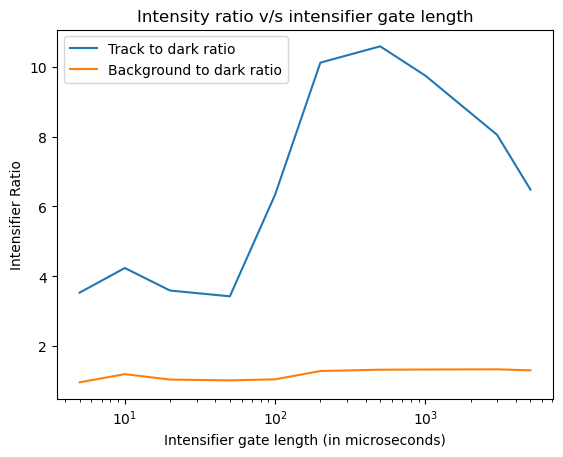

In [13]:
plt.plot(x_axis, (np.array(I_track)[sorted_indices]/(np.array(I_dark)[sorted_indices])), label='Track to dark ratio')
plt.plot(x_axis, (np.array(I_back)[sorted_indices]/(np.array(I_dark)[sorted_indices])), label='Background to dark ratio')
plt.xlabel('Intensifier gate length (in microseconds)')
plt.ylabel('Intensifier Ratio')
plt.title('Intensity ratio v/s intensifier gate length')
plt.xscale('log')
plt.legend()
#plt.savefig('10 being the cutoff.png')

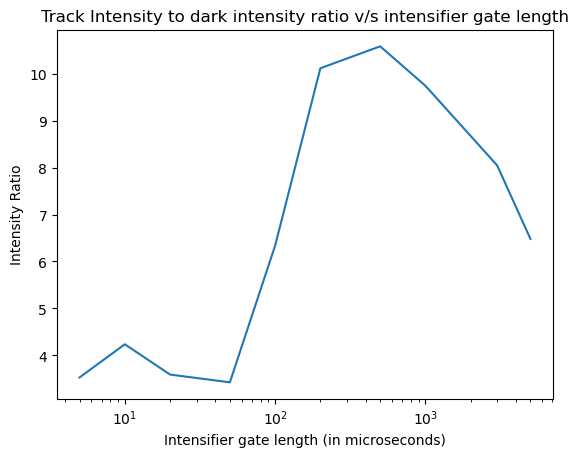

In [14]:
plt.plot(x_axis, (np.array(I_track)[sorted_indices]/(np.array(I_dark)[sorted_indices])))
plt.xlabel('Intensifier gate length (in microseconds)')
plt.ylabel('Intensity Ratio')
plt.title('Track Intensity to dark intensity ratio v/s intensifier gate length')
plt.xscale('log')
plt.savefig('Track intensity ratio.png')

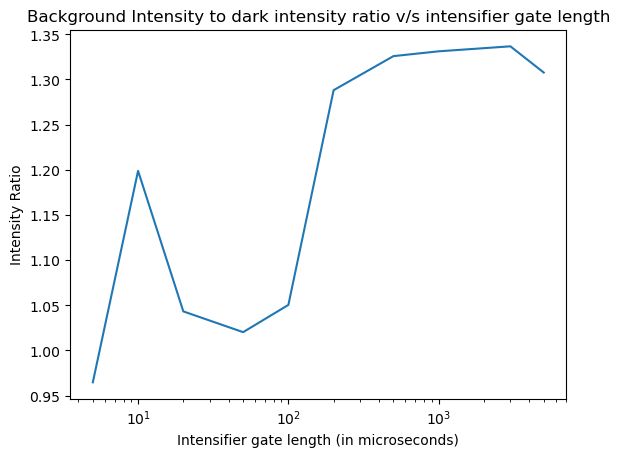

In [15]:
plt.plot(x_axis, (np.array(I_back)[sorted_indices]/(np.array(I_dark)[sorted_indices])))
plt.xlabel('Intensifier gate length (in microseconds)')
plt.ylabel('Intensity Ratio')
plt.title('Background Intensity to dark intensity ratio v/s intensifier gate length')
plt.xscale('log')
plt.savefig('Background intensity ratio.png')